In [7]:
import tsfel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract features using TSFEL
# Loading the X_train and X_test data
X_train = np.load('../FinalDataset/X_train.npy')
X_test = np.load('../FinalDataset/X_test.npy')


In [8]:

# Loading the y_train and y_test data
y_train = np.load('../FinalDataset/y_train.npy')
y_test = np.load('../FinalDataset/y_test.npy')

cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg,X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg,X_test, verbose=1,fs =50)

print("Shape of train data after performing feature creation using tsfel:",X_train_tsfel.shape)
print("Shape of test data after performing feature creation using tsfel:",X_test_tsfel.shape)
# print(X_train_tsfel_features.columns)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Shape of train data after performing feature creation using tsfel: (126, 1152)
Shape of test data after performing feature creation using tsfel: (54, 1152)


In [9]:
# from sklearn.feature_selection import VarianceThreshold
# from sklearn import preprocessing

# # Highly correlated features are removed
# corr_features = tsfel.correlated_features(X_train_tsfel)

# X_train_tsfel_updated = X_train_tsfel.drop(corr_features, axis=1)
# X_test_tsfel_updated = X_test_tsfel.drop(corr_features, axis=1)
# # X_test_tsfel.drop(corr_features, axis=1, inplace=True)
# print(X_train_tsfel_updated.shape , X_test_tsfel_updated.shape)

# # Remove low variance features
# selector = VarianceThreshold(threshold = 0.1) # default is 0
# X_train_tsfel_modified = selector.fit_transform(X_train_tsfel_updated)
# X_test_tsfel_modified = selector.transform(X_test_tsfel_updated)
# print(X_train_tsfel_modified.shape , X_test_tsfel.shape)

# # np.save('../FinalDataset/X_train_tsfel_reduced.npy', X_train_tsfel_modified)
# # np.save('../FinalDataset/X_test_tsfel_reduced.npy', X_test_tsfel_modified)

In [10]:
# # Normalising Features
# scaler = preprocessing.StandardScaler()
# nX_train_tsfel = scaler.fit_transform(X_train_tsfel_modified)
# nX_test_tsfel = scaler.transform(X_test_tsfel_modified)
# print(X_train_tsfel.shape , X_test_tsfel.shape)

# pca = PCA(n_components=2)
# X_train_tsfel_pca = pca.fit_transform(nX_train_tsfel)
# X_test_tsfel_pca = pca.transform(nX_test_tsfel)

# print("Shape of train data after PCA:", X_train_tsfel_pca.shape)
# print("Shape of test data after PCA:", X_test_tsfel_pca.shape)

# # np.save('../FinalDataset/X_train_tsfel_pca.npy', X_train_tsfel_pca)
# # np.save('../FinalDataset/X_test_tsfel_pca.npy', X_test_tsfel_pca)

(126, 1152) (54, 1152)
(126, 1152) (54, 1152)


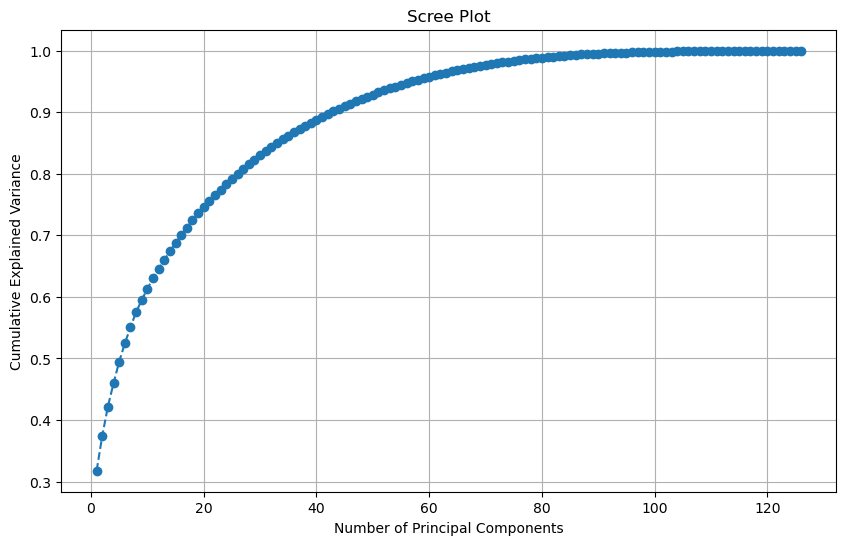

Number of components to retain 95% variance: 57
Reduced training data shape:  (126, 57)
Reduced testing data shape:  (54, 57)
Variance captured by 2 components: 0.37
Variance captured by 3 components: 0.42


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

print(X_train_tsfel.shape , X_test_tsfel.shape)
# Normalising Features
scaler = preprocessing.StandardScaler()
X_train_tsfel_test = scaler.fit_transform(X_train_tsfel)
X_test_tsfel_test = scaler.transform(X_test_tsfel)
print(X_train_tsfel_test.shape , X_test_tsfel_test.shape)
# Perform PCA
pca = PCA()
pca.fit(X_train_tsfel_test)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Decide on the number of components to retain
variance_threshold = 0.95  # For example, you want to retain 95% of the variance
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold * 100:.0f}% variance: {num_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_tsfel_test)
X_test_pca = pca.transform(X_test_tsfel_test)

print("Reduced training data shape: ", X_train_pca.shape)
print("Reduced testing data shape: ", X_test_pca.shape)

# Print the variance captured by the first 2 and 3 components
variance_2_components = cumulative_explained_variance[1]  # 2 components
variance_3_components = cumulative_explained_variance[2]  # 3 components

print(f"Variance captured by 2 components: {variance_2_components:.2f}")
print(f"Variance captured by 3 components: {variance_3_components:.2f}")

In [12]:
# Decide on the number of components to retain
variance_threshold = 0.80  # For example, you want to retain 80% of the variance
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold * 100:.0f}% variance: {num_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_tsfel_test)
X_test_pca = pca.transform(X_test_tsfel_test)

print("Reduced training data shape: ", X_train_pca.shape)
print("Reduced testing data shape: ", X_test_pca.shape)

# Print the variance captured by the first 2 and 3 components
variance_2_components = cumulative_explained_variance[1]  # 2 components
variance_3_components = cumulative_explained_variance[2]  # 3 components

print(f"Variance captured by 2 components: {variance_2_components:.2f}")
print(f"Variance captured by 3 components: {variance_3_components:.2f}")

Number of components to retain 80% variance: 27
Reduced training data shape:  (126, 27)
Reduced testing data shape:  (54, 27)
Variance captured by 2 components: 0.37
Variance captured by 3 components: 0.42


In [13]:
# Decide on the number of components to retain
variance_threshold = 0.50  # For example, you want to retain 95% of the variance
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold * 100:.0f}% variance: {num_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_tsfel_test)
X_test_pca = pca.transform(X_test_tsfel_test)

print("Reduced training data shape: ", X_train_pca.shape)
print("Reduced testing data shape: ", X_test_pca.shape)

# Print the variance captured by the first 2 and 3 components
variance_2_components = cumulative_explained_variance[1]  # 2 components
variance_3_components = cumulative_explained_variance[2]  # 3 components

print(f"Variance captured by 2 components: {variance_2_components:.2f}")
print(f"Variance captured by 3 components: {variance_3_components:.2f}")

Number of components to retain 50% variance: 6
Reduced training data shape:  (126, 6)
Reduced testing data shape:  (54, 6)
Variance captured by 2 components: 0.37
Variance captured by 3 components: 0.42


In [14]:
# Decide on the number of components to retain
variance_threshold = 0.99  # For example, you want to retain 95% of the variance
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold * 100:.0f}% variance: {num_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_tsfel_test)
X_test_pca = pca.transform(X_test_tsfel_test)

print("Reduced training data shape: ", X_train_pca.shape)
print("Reduced testing data shape: ", X_test_pca.shape)

# Print the variance captured by the first 2 and 3 components
variance_2_components = cumulative_explained_variance[1]  # 2 components
variance_3_components = cumulative_explained_variance[2]  # 3 components

print(f"Variance captured by 2 components: {variance_2_components:.2f}")
print(f"Variance captured by 3 components: {variance_3_components:.2f}")

Number of components to retain 99% variance: 82
Reduced training data shape:  (126, 82)
Reduced testing data shape:  (54, 82)
Variance captured by 2 components: 0.37
Variance captured by 3 components: 0.42


In [21]:
# Decide on the number of components to retain
variance_threshold = 1.00  # For example, you want to retain 95% of the variance
num_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold * 100:.0f}% variance: {num_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_tsfel_test)
X_test_pca = pca.transform(X_test_tsfel_test)

print("Reduced training data shape: ", X_train_pca.shape)
print("Reduced testing data shape: ", X_test_pca.shape)

# Print the variance captured by the first 2 and 3 components
variance_2_components = cumulative_explained_variance[1]  # 2 components
variance_3_components = cumulative_explained_variance[2]  # 3 components

print(f"Variance captured by 2 components: {variance_2_components:.2f}")
print(f"Variance captured by 3 components: {variance_3_components:.2f}")

Number of components to retain 100% variance: 125
Reduced training data shape:  (126, 125)
Reduced testing data shape:  (54, 125)
Variance captured by 2 components: 0.37
Variance captured by 3 components: 0.42


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_pca, y_train)


DecisionTreeClassifier(random_state=42)

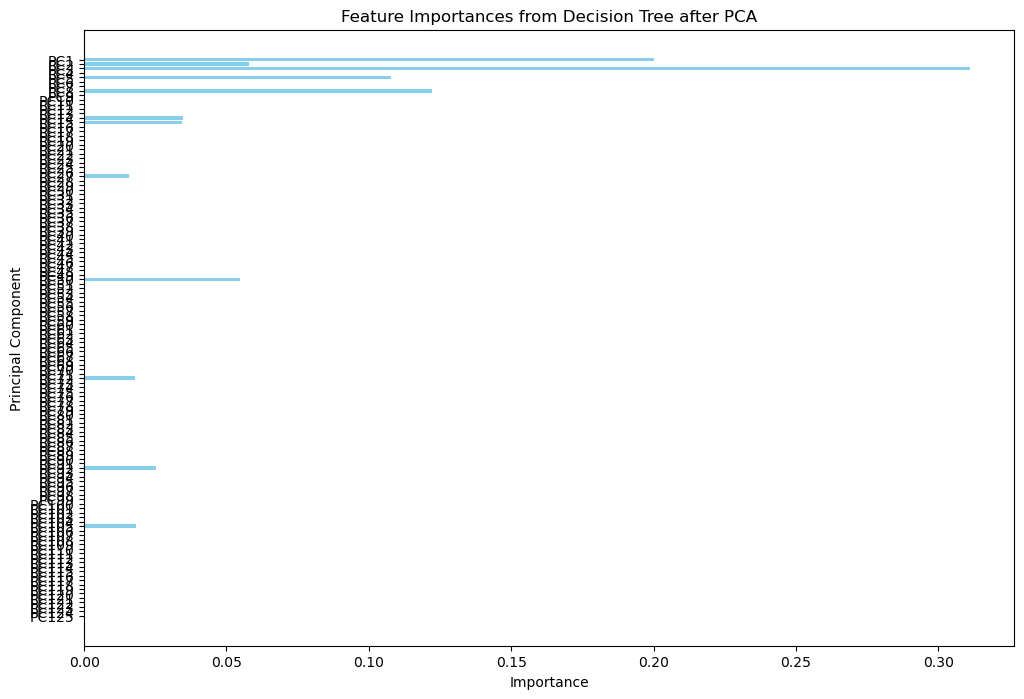

In [25]:

# Get feature importances based on PCA components
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(importances)), importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Principal Component')
plt.title('Feature Importances from Decision Tree after PCA')
plt.yticks(range(len(importances)), [f'PC{i+1}' for i in range(len(importances))])
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

In [26]:


# Train a model on the original data
model_original = DecisionTreeClassifier(random_state=42)
model_original.fit(X_train.reshape(), y_train)

# Get feature importances
importances_original = model_original.feature_importances_

# Create a DataFrame for feature importances
importance_df_original = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_original
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_original['Feature'], importance_df_original['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest before PCA')
plt.gca().invert_yaxis()
plt.show()


ValueError: Found array with dim 3. DecisionTreeClassifier expected <= 2.